## Import Library

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
df = pd.read_csv("dataset/loan_approval_dataset.csv")

# EDA

In [224]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [225]:
df.shape

(4269, 13)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [227]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [228]:
df.columns = df.columns.str.replace(' ','')

In [229]:
kategorikal = df.select_dtypes(exclude='number').columns
numerikal = df.select_dtypes(include='number').columns

In [230]:
df.duplicated().sum()

np.int64(0)

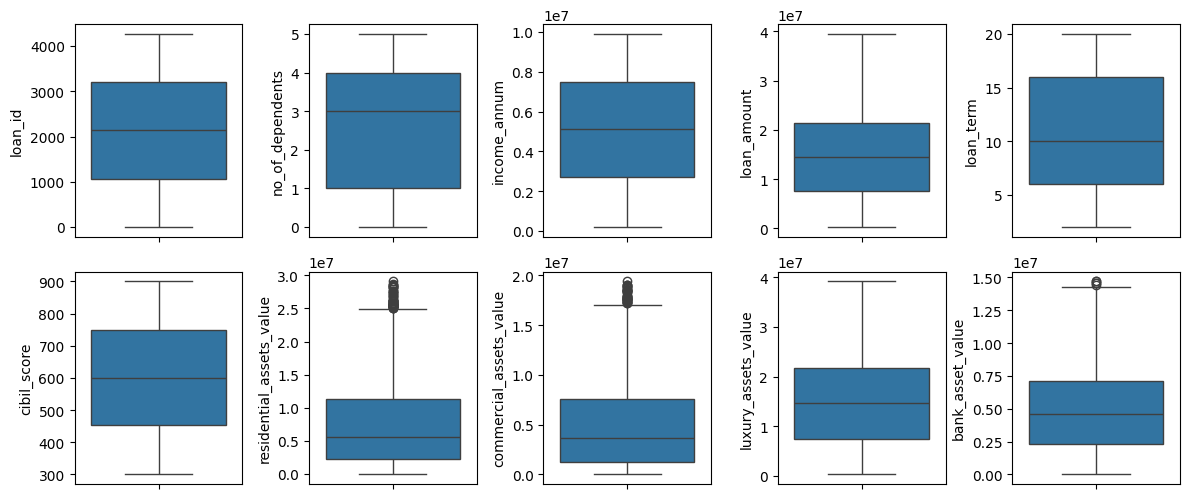

In [231]:
plt.figure(figsize=(12,10))

for i, col in enumerate(numerikal):
    plt.subplot(4, 5, i+1)
    sns.boxplot(df[col])

plt.tight_layout()
plt.show()

In [232]:
for col in numerikal:
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    IQR = q3 - q1
    upper = q3 + IQR*1.5
    df[col] = df[col].clip(upper=upper)


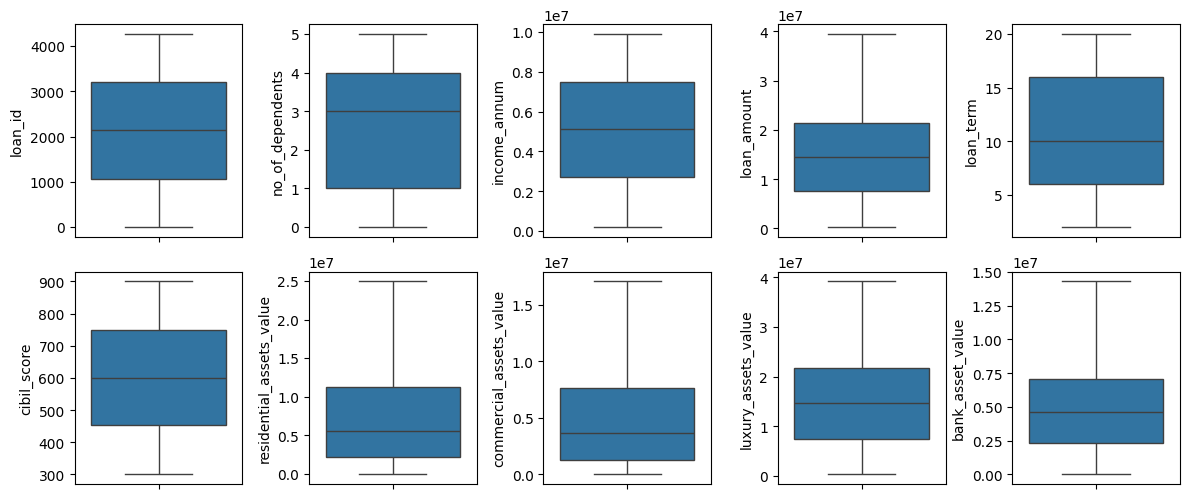

In [233]:
plt.figure(figsize=(12,10))

for i, col in enumerate(numerikal):
    plt.subplot(4, 5, i+1)
    sns.boxplot(df[col])

plt.tight_layout()
plt.show()

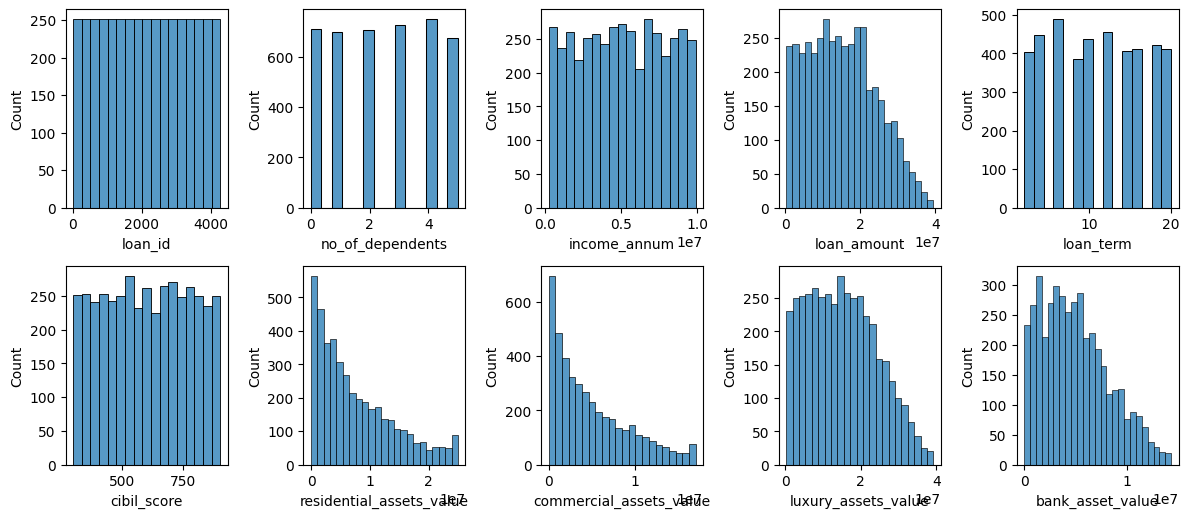

In [234]:
plt.figure(figsize=(12,10))

for i, col in enumerate(numerikal):
    plt.subplot(4, 5, i+1)
    sns.histplot(df[col])

plt.tight_layout()
plt.show()

<Axes: >

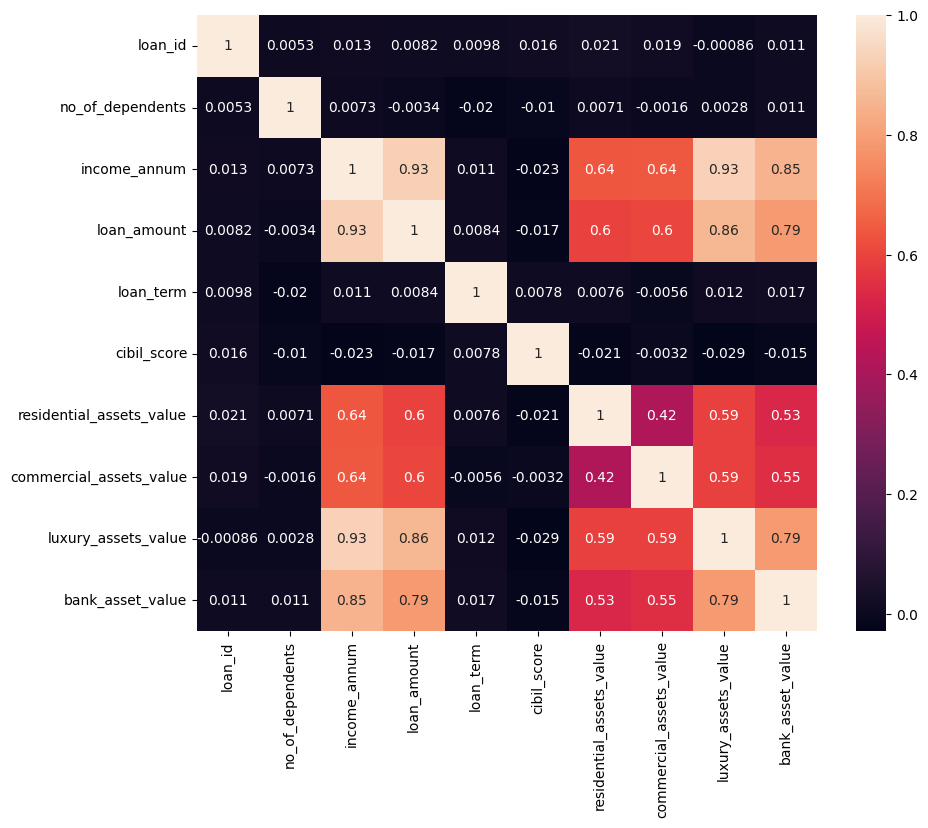

In [235]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerikal].corr(), annot=True)

### Start with simple model

# Preprocessing

In [236]:
class LabelEncoder:
    def __init__(self):
        self.encode = {}
        self.decode = {}

    def fit(self, data):
        unique = sorted(set(data))
        self.encode = {label: index for index, label in enumerate(unique)}
        self.decode = {index: label for label, index in self.encode.items()}

    def transform(self, data):
        return [self.encode[label] for label in data]

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

    def inverse_transform(self, encoded_value):
        return [self.decode[label] for label in encoded_value.items()]

In [237]:
le = LabelEncoder()
for col in kategorikal:
    df[col] = le.fit_transform(df[col])

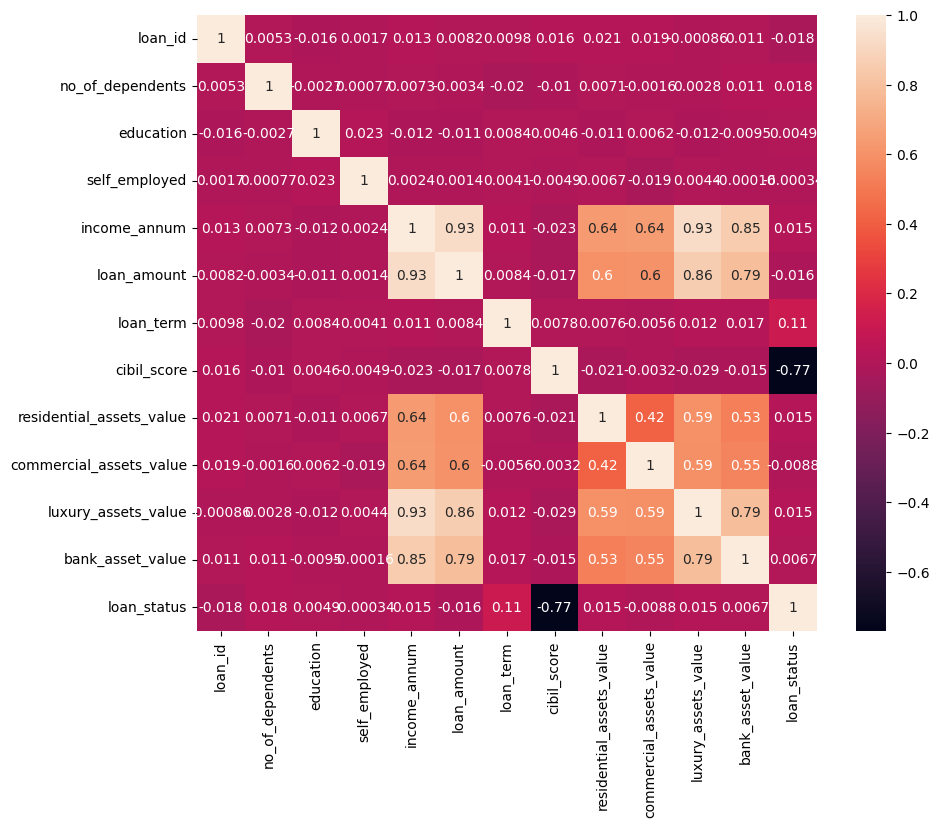

In [238]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [250]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_pca1 = pca.fit_transform(X)
X_pca1

array([[ 2.87285365, -0.29818975],
       [-1.29671756,  0.76573494],
       [ 3.20390513, -0.29836193],
       ...,
       [ 1.38165464,  0.80784136],
       [-0.52026909,  0.69458474],
       [ 4.36706461, -0.33301326]], shape=(4269, 2))

In [239]:
X = df.drop('loan_status', axis=1)
y = df.loan_status

In [240]:
def standart_scaler(X):
    x = np.array(X)
    mean = np.mean(x)
    std = np.std(x)
    return (x - mean) / std

In [241]:
X = X.apply(standart_scaler)

In [242]:
def train_test_split(X, y, test_size, random_state):
    if random_state is not None:
        np.random.seed(random_state)

    total_sample = X.shape[0]
    indices = np.random.permutation(total_sample)
    split = int(total_sample * (1 - test_size))

    X_train = X.iloc[indices[:split]]
    X_test = X.iloc[indices[split:]]
    y_train = y.iloc[indices[:split]]
    y_test = y.iloc[indices[split:]]
    return X_train, X_test, y_test, y_train

In [243]:
 X_train, X_test, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [244]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3415, 12)
(854, 12)
(3415,)
(854,)


In [245]:
class KNN:
    def __init__(self, k, weight):
        self.k = k
        self.weight = weight

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def euclidean(self, a, b):
        return np.sqrt(np.sum((np.array(a) - np.array(b))**2))

    def get_n(self, test_point):
        distances = []
        for x, y in zip(self.X_train, self.y_train):
            dist = self.euclidean(x, test_point)
            distances.append((dist, y))

        # mengurutkan data
        distances.sort(key= lambda x: x[0])
        return distances[:self.k]

    def predict(self, X_test):
        prediction = []
        X_test = np.array(X_test)
        for x in X_test:
            neighbors = self.get_n(x)

            if self.weight == 'uniform':
                label = [label for _, label in neighbors]
                pred = max(set(label), key=label.count)
    
            elif self.weight == 'distance':
                label_weight = {}
                for dist, label in neighbors:
                    weight = 1 / (dist + 1e-5)
                    if label in label_weight:
                        label_weight[label] += weight
                    else :
                        label_weight[label] = weight

                        pred = max(label_weight.items(), key= lambda x: x[1])[0]
            else :
                print('masukkan weight!')
            prediction.append(pred)
        return np.array(prediction)


    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test) *100
        return accuracy

In [246]:
model = KNN(k=13, weight='uniform')
model.fit(X_train, y_train)
model.score(X_test, y_test)

np.float64(92.7400468384075)

In [247]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.927400468384075

In [248]:
def find_best_k(X_train, y_train, X_test, y_test, max_k=20, weight='uniform'):
    accuracies = []
    ks = list(range(1, max_k+1))

    for k in ks:
        model = KNN(k=k, weight=weight)
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        accuracies.append(acc)
        print(f"k = {k} → Akurasi: {acc:.2f}%")

    # Plot hasil
    plt.figure(figsize=(8,5))
    plt.plot(ks, accuracies, marker='o', linestyle='-', color='teal')
    plt.title("Elbow Method - Mencari k Terbaik")
    plt.xlabel("Nilai k")
    plt.ylabel("Akurasi (%)")
    plt.xticks(ks)
    plt.grid(True)
    plt.show()

    # Mendapatkan k dengan akurasi tertinggi
    best_k = ks[accuracies.index(max(accuracies))]
    print(f"\n Nilai k terbaik adalah {best_k} dengan akurasi {max(accuracies):.2f}%")
    return best_k


In [256]:
best_k = find_best_k(X_train, y_train, X_test, y_test, max_k=25, weight='uniform')

k = 1 → Akurasi: 85.25%
k = 2 → Akurasi: 84.89%
k = 3 → Akurasi: 88.99%
k = 4 → Akurasi: 87.47%
k = 5 → Akurasi: 90.05%
k = 6 → Akurasi: 89.58%
k = 7 → Akurasi: 91.69%
k = 8 → Akurasi: 91.22%
k = 9 → Akurasi: 92.27%
k = 10 → Akurasi: 91.92%
k = 11 → Akurasi: 92.39%
k = 12 → Akurasi: 92.04%
k = 13 → Akurasi: 92.74%
k = 14 → Akurasi: 92.51%
k = 15 → Akurasi: 92.15%
k = 16 → Akurasi: 91.92%
k = 17 → Akurasi: 91.80%
k = 18 → Akurasi: 92.04%
k = 19 → Akurasi: 92.51%
k = 20 → Akurasi: 92.04%
k = 21 → Akurasi: 91.80%
k = 22 → Akurasi: 91.57%
k = 23 → Akurasi: 91.80%
k = 24 → Akurasi: 91.80%
k = 25 → Akurasi: 92.04%

🎯 Nilai k terbaik adalah 13 dengan akurasi 92.74%
